# Data Preparation and Exploration

In [2]:
import pandas as pd

exchange_rate_df = pd.read_csv('exchange_rate.csv')
display(exchange_rate_df.head())

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [3]:
exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], format='%d-%m-%Y %H:%M')
exchange_rate_df = exchange_rate_df.set_index('date')
display(exchange_rate_df.head())

,Ex_rate
date,
1990-01-01,0.7855
1990-01-02,0.7818
1990-01-03,0.7867
1990-01-04,0.7860
1990-01-05,0.7849


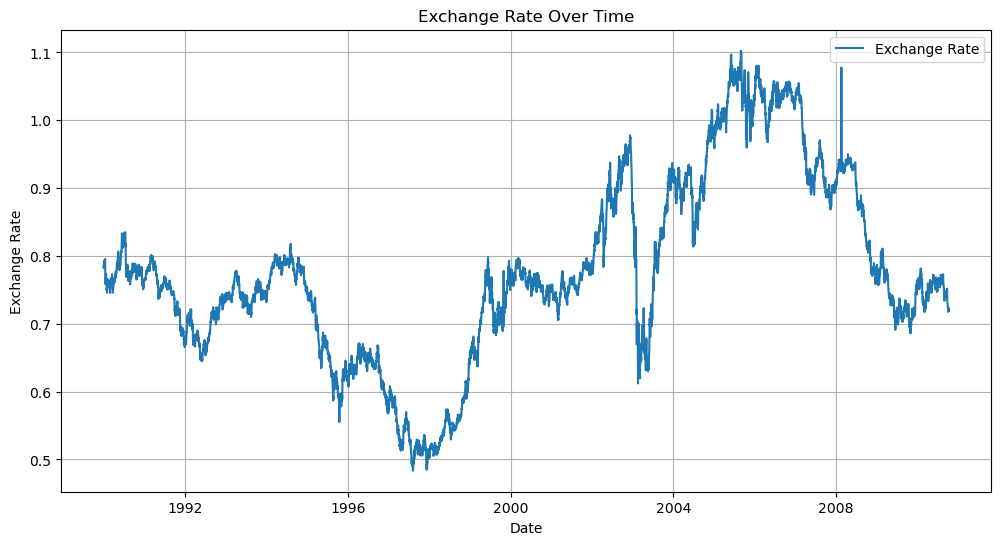

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(exchange_rate_df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
missing_values = exchange_rate_df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Ex_rate    0
dtype: int64


In [6]:
duplicate_indices = exchange_rate_df.index.duplicated().sum()
print(f'Number of duplicate indices: {duplicate_indices}')

Number of duplicate indices: 0


# Model Building - ARIMA

In [7]:
from statsmodels.tsa.stattools import adfuller
print("Imported adfuller for ADF test.")

Imported adfuller for ADF test.


In [8]:
adf_test_original = adfuller(exchange_rate_df['Ex_rate'])
p_value_original = adf_test_original[1]
print(f"ADF Test p-value for original 'Ex_rate' series: {p_value_original}")

ADF Test p-value for original 'Ex_rate' series: 0.4492327353597486


In [9]:
df_diff = exchange_rate_df['Ex_rate'].diff().dropna()
adf_test_diff = adfuller(df_diff)
p_value_diff = adf_test_diff[1]
print(f"ADF Test p-value for differenced 'Ex_rate' series: {p_value_diff}")

ADF Test p-value for differenced 'Ex_rate' series: 0.0


In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
print("Imported plot_acf and plot_pacf for ACF/PACF plots.")

Imported plot_acf and plot_pacf for ACF/PACF plots.


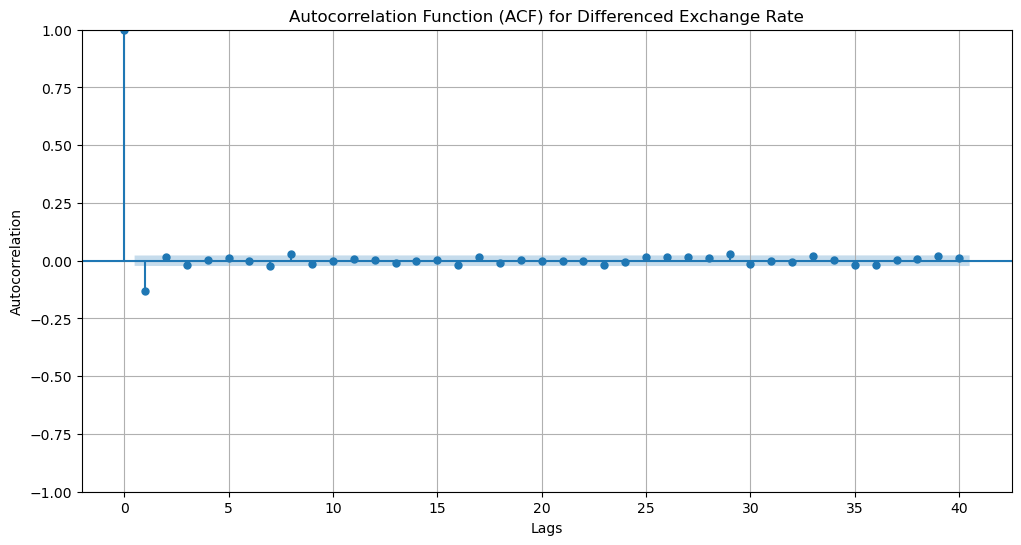

C:\Users\Likitha\anaconda3\New folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


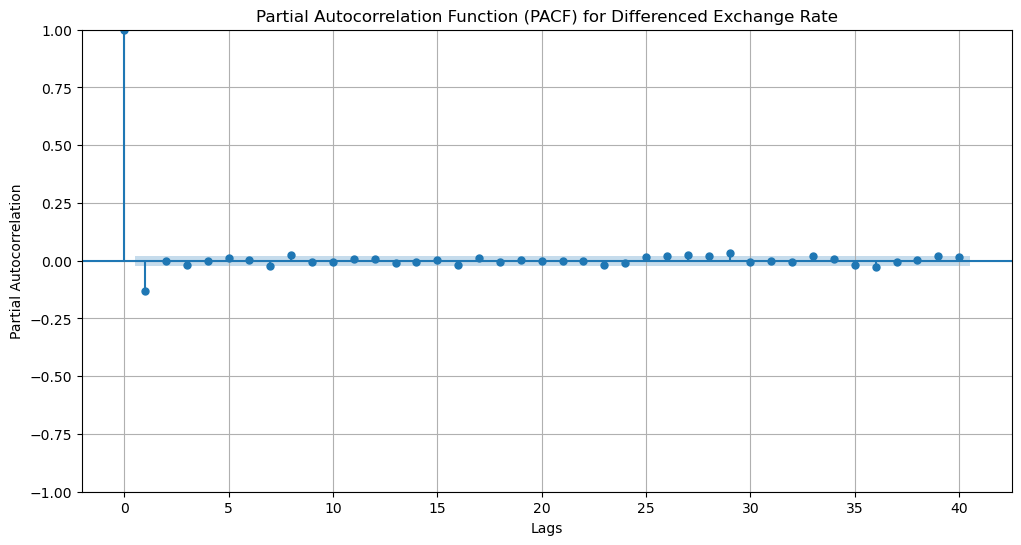

In [11]:
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df_diff, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Exchange Rate')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df_diff, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) for Differenced Exchange Rate')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the ARIMA model with the determined order (p, d, q)
arima_model = ARIMA(exchange_rate_df['Ex_rate'], order=(1, 1, 1))

# Fit the ARIMA model to the data
arima_model_fit = arima_model.fit()

print("ARIMA model fitted successfully.")

C:\Users\Likitha\anaconda3\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Likitha\anaconda3\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Likitha\anaconda3\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA model fitted successfully.


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Ensure the index has a daily frequency to avoid ValueWarning
# If there were missing days, this would introduce NaNs, but previous checks showed no missing values.
exchange_rate_df_daily = exchange_rate_df['Ex_rate'].asfreq('D')

# Instantiate the ARIMA model with the determined order (p, d, q)
arima_model = ARIMA(exchange_rate_df_daily, order=(1, 1, 1))

# Fit the ARIMA model to the data
arima_model_fit = arima_model.fit()

print("ARIMA model fitted successfully.")

ARIMA model fitted successfully.


In [14]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 19 Feb 2026   AIC                         -56102.322
Time:                        11:05:12   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

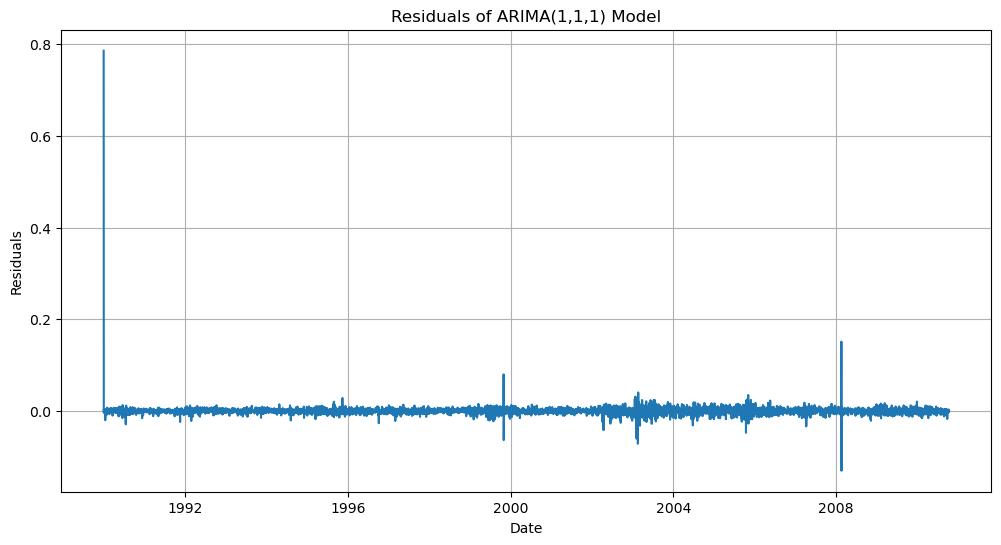

In [15]:
import matplotlib.pyplot as plt

# Get the residuals from the fitted ARIMA model
residuals = arima_model_fit.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA(1,1,1) Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

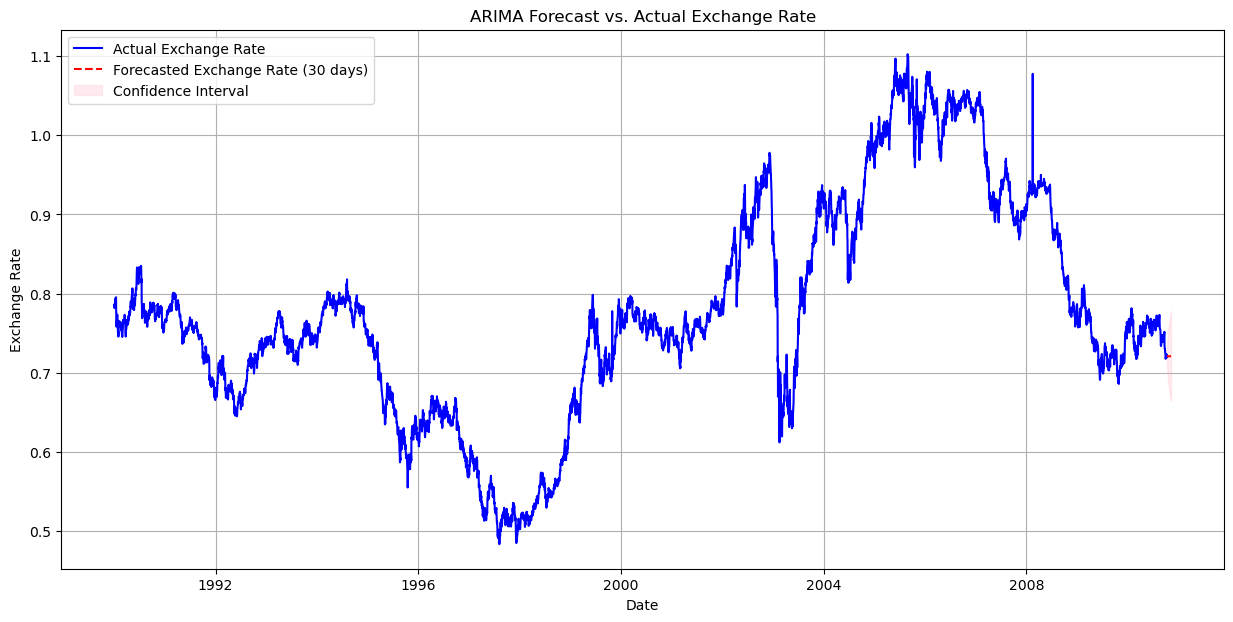

In [16]:
import matplotlib.pyplot as plt

# 1. Determine the number of steps to forecast
forecast_steps = 30 # Example: forecast for the next 30 days

# 2. Generate the forecast
forecast_results = arima_model_fit.get_forecast(steps=forecast_steps)

# 3. Extract the predicted mean values
forecast_mean = forecast_results.predicted_mean

# 4. Extract the confidence intervals
forecast_conf_int = forecast_results.conf_int()

# Plotting
plt.figure(figsize=(15, 7))

# 5. Plot the original time series
plt.plot(exchange_rate_df_daily.index, exchange_rate_df_daily, label='Actual Exchange Rate', color='blue')

# 6. Overlay the forecasted values
plt.plot(forecast_mean.index, forecast_mean, label=f'Forecasted Exchange Rate ({forecast_steps} days)', color='red', linestyle='--')

# 7. Shade the area representing the confidence interval
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

# 8. Add a title to the plot
plt.title('ARIMA Forecast vs. Actual Exchange Rate')

# 9. Label the x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

# 10. Include a legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# 11. Display the plot
plt.show()

# : Evaluation and Comparison


In [17]:
train_size = len(exchange_rate_df_daily) - 30
train_data = exchange_rate_df_daily[:train_size]
test_data = exchange_rate_df_daily[train_size:]

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")
print(f"Test data start date: {test_data.index.min()}")
print(f"Test data end date: {test_data.index.max()}")

Training set size: 7558
Test set size: 30
Test data start date: 2010-09-11 00:00:00
Test data end date: 2010-10-10 00:00:00


In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Refit the ARIMA model on the training data
arima_model_train = ARIMA(train_data, order=(1, 1, 1))
arima_model_fit_train = arima_model_train.fit()

print("ARIMA model refitted successfully on training data.")

ARIMA model refitted successfully on training data.


In [19]:
predictions = arima_model_fit_train.predict(start=len(train_data), end=len(exchange_rate_df_daily)-1)
print("Predictions generated for the test set.")

Predictions generated for the test set.


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test_data, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    # Handle potential division by zero by replacing actual values close to zero with a small epsilon
    epsilon = np.finfo(np.float64).eps
    y_true_safe = np.where(np.abs(y_true) < epsilon, epsilon, y_true)
    return np.mean(np.abs((y_true_safe - y_pred) / y_true_safe)) * 100

mape = mean_absolute_percentage_error(test_data, predictions)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Mean Absolute Error (MAE): 0.0135
Root Mean Squared Error (RMSE): 0.0166
Mean Absolute Percentage Error (MAPE): 1.8632%
